<a href="https://colab.research.google.com/github/Meera-Ajay-25/CNN-projects/blob/main/Temple_Architecture_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Name: **Classification of Indian temples based on their architecture using Convolutional Nueral Network(CNN)**

AIM: The dataset consists of 4 different temple images. 'Kedarnath Temple', 'Golden Temple','Meenakshi Amman Temple','Kashi Vishwanath Temple'.Each set has 100 images. Multi-class CNN can be performed on this dataset to classify the temples based on their architecture.

Steps:
1)Importing the necessary libraries

2)Splitting in to train data and test data

3)Create the CNN model

4)Compile and train the model

5)Prediction

In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from skimage.io import imread
from skimage.transform import resize

In [ ]:
os.listdir('/content/drive/MyDrive/Indian Temples/Training data')

['Kedarnath Temple',
 'Golden Temple',
 'Meenakshi Amman Temple',
 'Kashi Vishwanath Temple']

In [ ]:
data_path='/content/drive/MyDrive/Indian Temples/Training data'
temple_names=['Kedarnath Temple','Golden Temple','Meenakshi Amman Temple','Kashi Vishwanath Temple']

In [ ]:
def load_dataset():
  images=[]
  labels=[]

  for temple_name in temple_names:
    temple_path=os.path.join(data_path,temple_name)

    for image in os.listdir(temple_path):
      images_path=os.path.join(temple_path,image)
      image=imread(images_path)
      image_res=resize(image,(150,150,3))
      images.append(image_res)
      labels.append(temple_names.index(temple_name))
  images=np.array(images)
  labels=np.array(labels)
  labels=to_categorical(labels)

  return images,labels
images,labels=load_dataset()

**Splitting into train and test data**

In [ ]:
#Split the dataset into training and testing sets:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

**Model building using CNN**

In [ ]:
num_classes = len(temple_names)  # Replace this with the actual number of classes

model = Sequential()
model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  # Use num_classes instead of temple_names

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Create an instance of ImageDataGenerator with desired augmentation options
datagen = ImageDataGenerator(
    rotation_range=20,  # Randomly rotate images by 20 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally by 20% of the width
    height_shift_range=0.2,  # Randomly shift images vertically by 20% of the height
    shear_range=0.2,  # Apply shear transformation with a shear angle of 20 degrees
    zoom_range=0.2,  # Apply random zoom between 80% and 120% of original size
    horizontal_flip=True,  # Randomly flip images horizontally
    vertical_flip=False  # Do not flip images vertically
)

# Fit the ImageDataGenerator on your training data
datagen.fit(x_train)

**Training the model**

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(datagen.flow(x_train,y_train,batch_size=32),epochs=50,validation_data=(x_test, y_test))

Epoch 1/50
10/10 [==============================] - 15s 1s/step - loss: 1.5204 - accuracy: 0.2298 - val_loss: 1.4052 - val_accuracy: 0.1923
Epoch 2/50
10/10 [==============================] - 13s 1s/step - loss: 1.3584 - accuracy: 0.2945 - val_loss: 1.3462 - val_accuracy: 0.2436
Epoch 3/50
10/10 [==============================] - 13s 1s/step - loss: 1.2558 - accuracy: 0.4434 - val_loss: 1.2437 - val_accuracy: 0.4615
Epoch 4/50
10/10 [==============================] - 13s 1s/step - loss: 1.1993 - accuracy: 0.4790 - val_loss: 1.2387 - val_accuracy: 0.4744
Epoch 5/50
10/10 [==============================] - 13s 1s/step - loss: 1.1346 - accuracy: 0.4790 - val_loss: 1.1727 - val_accuracy: 0.5000
Epoch 6/50
10/10 [==============================] - 13s 1s/step - loss: 1.1049 - accuracy: 0.5178 - val_loss: 1.2678 - val_accuracy: 0.4487
Epoch 7/50
10/10 [==============================] - 13s 1s/step - loss: 1.1524 - accuracy: 0.5178 - val_loss: 1.3068 - val_accuracy: 0.4487
Epoch 8/50
10/10 [==

In [ ]:
#Evaluate the model on the test set:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

3/3 [==============================] - 1s 310ms/step - loss: 0.4764 - accuracy: 0.8205
Test Loss: 0.4764
Test Accuracy: 0.8205


**Prediction**

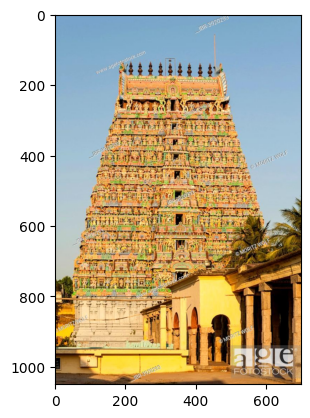

In [85]:
from skimage.io import imread
import matplotlib.pyplot as plt
img=imread("/content/drive/MyDrive/Indian Temples/m1.jpg")
plt.imshow(img)

In [86]:
from skimage.transform import resize
img = resize(img, (150, 150, 3))
img_array = np.array(img)
img_array = img_array.reshape(150, 150, 3)

In [87]:
pred = model.predict(np.expand_dims(img_array, axis=0))
print(pred)

1/1 [==============================] - 0s 35ms/step
[[0.0038055  0.10114127 0.8180611  0.07699211]]


In [88]:
#to take index of higest value in pred
ind=pred.argmax()
print(ind)

2


In [89]:
categories = ['Kedarnath Temple','Golden Temple','Meenakshi Amman Temple','Kashi Vishwanath Temple']
print(categories[ind])

Meenakshi Amman Temple


***End of Code***